In [1]:
# Allow importing from src folder
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from src.preprocess import load_data, clean_data, feature_engineering, merge_geolocation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load Data
fraud_df = load_data('../data/raw/Fraud_Data.csv')
ip_df = load_data('../data/raw/IpAddress_to_Country.csv')

# Clean and Feature Engineer
fraud_df = clean_data(fraud_df)
fraud_df = feature_engineering(fraud_df)

# Merge Countries 
fraud_df = merge_geolocation(fraud_df, ip_df)

# Validate it worked
print(fraud_df[['user_id', 'country', 'time_since_signup']].head())

2025-12-26 06:17:24,741 - INFO - Data loaded successfully from ../data/raw/Fraud_Data.csv. Shape: (151112, 11)
2025-12-26 06:17:24,991 - INFO - Data loaded successfully from ../data/raw/IpAddress_to_Country.csv. Shape: (138846, 3)
2025-12-26 06:17:26,798 - INFO - Starting Geolocation Merge...
2025-12-26 06:17:27,003 - INFO - Geolocation Merge Completed.


   user_id  country  time_since_signup
0    62421  Unknown          1763014.0
1   173212  Unknown          1084823.0
2   242286  Unknown           749320.0
3   370003  Unknown          7434634.0
4   119824  Unknown          1407619.0


2025-12-26 06:17:27,516 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-26 06:17:27,837 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


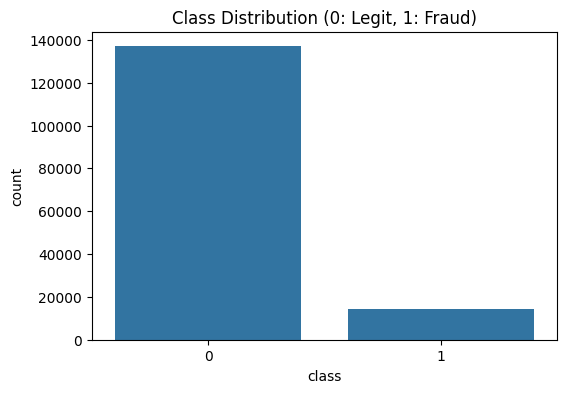

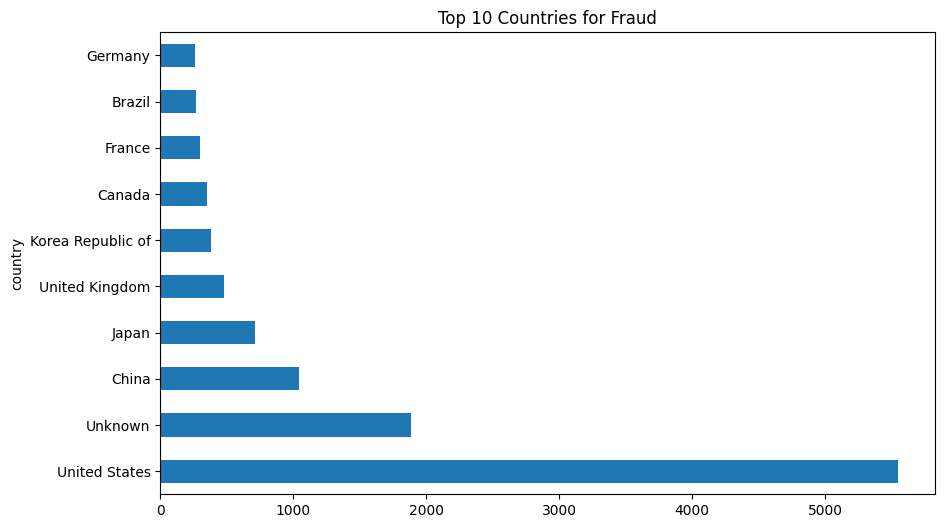

In [3]:
# 1. Class Imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.show()

# 2. Fraud by Country
fraud_counts = fraud_df[fraud_df['class'] == 1]['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
fraud_counts.plot(kind='barh')
plt.title("Top 10 Countries for Fraud")
plt.show()